# Pinkbike Downhill Fantasy League Analysis
## Setup
#### Import Libraries

If you do not have these libraries available, you should install them using `pip`

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

Finally found UCI online riders list

http://uci.ch/mountain-bike/teams/

Config

In [18]:
year = 2018
event = 'dh'
race = 3
gender = 'f'
topX = 10
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = True
dpi = 300

In [19]:
from config import races

racename = races[year][race]['name']
raceName = races[year][race]['title']
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

directory = event + str(race) + '_' + racename
file_prefix = event + str(race) + '_' + racename + '_' + gender
file_prefix = os.path.join( directory, file_prefix )

In [20]:
df = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )
dl = pd.read_csv( 'pinkbike_fantasy_costs_' + gender + '.csv' )

dfl = df.merge( dl, left_on='uci', right_on='uci', how='inner' )

In [21]:
dlen = len( df['status'].dropna() )
if topX > dlen:
    topX = dlen

In [22]:
dfl.head()

,bib,id,name_x,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost
0,2,2002,ATHERTON Rachel,16,74.580,116.942,160.266,212.906,249.889,2,40,Finished,10003434487,NaN,200.0,1.0,51.093,92.842,135.011,186.012,221.141,10.0,8.0,Finished,200.0,-28.748,37.0,22.124,0.000,31.0,19.111,0.000,42.362,1.0,0.000,0.000,30.0,20.540,0.000,43.324,3.0,1.429,0.000,18.0,21.165,0.000,52.640,3.0,1.043,0.000,16.0,22.661,0.000,36.983,5.0,1.496,0.000,1.0,0.000,0.000,1.0,0.000,0.000,41.749,2.0,0.492,0.000,1.0,0.000,0.000,42.169,1.0,0.000,0.000,2.0,0.503,0.000,51.001,2.0,1.004,0.000,1.0,0.000,0.000,35.129,2.0,0.715,0.000,51.360,49.859,14.266667,0.076667,2.0,5.0,1987-12-06T00:00:00,WE,ATHERTON,Rachel,1197024565271777,GBR,NCh,ATHERTON Rachel,0,2,ATHERTON R,2,48630000,GBR19871206,5,10003434487,TDH,1598,TREK FACTORY RACING DH,2,30,Rachel Atherton,675000
1,1,2001,NICOLE Myriam,5,52.456,103.344,146.517,202.422,238.608,1,41,Finished,10004535237,20.0,160.0,2.0,51.993,93.250,135.512,185.509,221.779,13.0,5.0,Finished,180.0,-16.829,1.0,0.000,-22.124,8.0,5.513,-13.598,50.888,32.0,8.526,8.526,5.0,6.791,-13.749,43.173,2.0,1.278,-0.151,7.0,10.681,-10.484,55.905,14.0,4.308,3.265,5.0,11.380,-11.281,36.186,3.0,0.699,-0.797,2.0,0.900,0.900,2.0,0.408,0.408,41.257,1.0,0.000,-0.492,2.0,0.501,0.501,42.262,2.0,0.093,0.093,1.0,0.000,-0.503,49.997,1.0,0.000,-1.004,2.0,0.638,0.638,36.270,4.0,1.856,1.141,51.636,50.493,14.343333,0.000000,1.0,3.0,1990-02-08T00:00:00,WE,NICOLE,Myriam,1197024565271776,FRA,WCL,NICOLE Myriam,0,1,NICOLE M,1,48600000,FRA19900208,1,10004535237,CVN,1590,COMMENCAL / VALLNORD,1,28,Myriam Nicole,625000
2,6,2006,HANNAH Tracey,2,55.436,99.536,143.504,195.101,230.608,5,37,Finished,10003732258,40.0,140.0,3.0,52.512,94.542,137.550,190.704,225.118,16.0,2.0,Finished,180.0,-5.490,3.0,2.980,-19.144,2.0,1.705,-17.406,44.100,5.0,1.738,1.738,2.0,3.778,-16.762,43.968,5.0,2.073,0.644,2.0,3.360,-17.805,51.597,1.0,0.000,-1.043,2.0,3.380,-19.281,35.507,2.0,0.020,-1.476,3.0,1.419,1.419,3.0,1.700,1.700,42.030,3.0,0.773,0.281,3.0,2.539,2.539,43.008,4.0,0.839,0.839,3.0,5.195,4.692,53.154,6.0,3.157,2.153,3.0,3.977,3.977,34.414,1.0,0.000,-0.715,51.019,50.985,14.171944,0.171389,3.0,2.0,1988-06-13T00:00:00,WE,HANNAH,Tracey,1197024565271780,AUS,NCh,HANNAH Tracey,0,6,HANNAH T,5,48720000,AUS19880613,3,10003732258,URT,1608,POLYGON UR,6,30,Tracey Hannah,600000
3,9,2009,HRASTNIK Monika,4,56.999,100.942,144.646,198.395,235.390,8,34,Finished,10017602955,25.0,125.0,4.0,55.303,99.647,142.59

,bib,id,name_x,q_rank,q_split1,q_split2,q_split3,q_split4,q_split5,q_start,q_start_rev,q_status,uci,q_points,r_points,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff,q_split1_rank,q_split1_vs_best,q_split1_vs_winner,q_split2_rank,q_split2_vs_best,q_split2_vs_winner,q_split2_sector,q_split2_sector_rank,q_split2_sector_vs_best,q_split2_sector_vs_winner,q_split3_rank,q_split3_vs_best,q_split3_vs_winner,q_split3_sector,q_split3_sector_rank,q_split3_sector_vs_best,q_split3_sector_vs_winner,q_split4_rank,q_split4_vs_best,q_split4_vs_winner,q_split4_sector,q_split4_sector_rank,q_split4_sector_vs_best,q_split4_sector_vs_winner,q_split5_rank,q_split5_vs_best,q_split5_vs_winner,q_split5_sector,q_split5_sector_rank,q_split5_sector_vs_best,q_split5_sector_vs_winner,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_best,split4_vs_winner,split4_sector,split4_sector_rank,split4_sector_vs_best,split4_sector_vs_winner,split5_rank,split5_vs_best,split5_vs_winner,split5_sector,split5_sector_rank,split5_sector_vs_best,split5_sector_vs_winner,speed,q_speed,speed_ms,speed_ms_vs_best,speed_rank,q_speed_rank,BirthDate,CategoryCode,FamilyName,GivenName,Id,Nation,Outfit,PrintName,RaceId,RaceNr,ScoreboardName,StartOrder,StartTime,UciCode,UciRank,UciRiderId,UciTeamCode,UciTeamId,UciTeamName,WorldCupRank,Age,name_y,cost,dpp
3,9,2009,HRASTNIK Monika,4,56.999,100.942,144.646,198.395,235.39,8,34,Finished,10017602955,25.0,125.0,4.0,55.303,99.647,142.596,194.214,229.597,14.0,4.0,Finished,150.0,-5.793,5.0,4.543,-17.581,4.0,3.111,-16.0,43.943,2.0,1.581,1.581,4.0,4.92,-15.62,43.704,4.0,1.809,0.38,4.0,6.654,-14.511,53.749,5.0,2.152,1.109,4.0,8.162,-14.499,36.995,6.0,1.508,0.012,6.0,4.21,4.21,5.0,6.805,6.805,44.344,7.0,3.087,2.595,4.0,7.585,7.585,42.949,3.0,0.78,0.78,4.0,8.705,8.202,51.618,3.0,1.621,0.617,4.0,8.456,8.456,35.383,3.0,0.969,0.254,50.537,49.485,14.038056,0.305278,5.0,7.0,1994-06-07T00:00:00,WE,HRASTNIK,Monika,1197024565271783,SLO,CCh,HRASTNIK Monika,0,9,HRASTNIK M,8,48810000,SLO19940607,7,10017602955,NaN,0,NaN,9,24,Monika Hrastnik,150000,1000.0


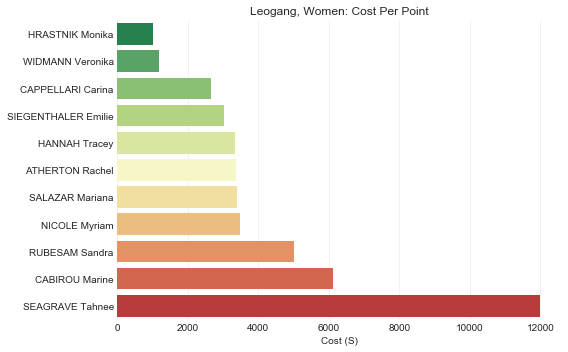

In [23]:
cnt = len( dfl[dfl.points > 0] )

dfl['dpp'] = dfl['cost']/dfl['points']
data = dfl.sort_values( 'dpp', ascending=True )
display( data.head(1) )
plt.figure(figsize=(8,10 if 'm' == gender else 5))
plot = sns.barplot( data['dpp'][:cnt], data['name_x'][:cnt], palette='RdYlGn_r' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Cost Per Point', xlabel='Cost (S)', ylabel='' )

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_cost_per_point.png', dpi=dpi )

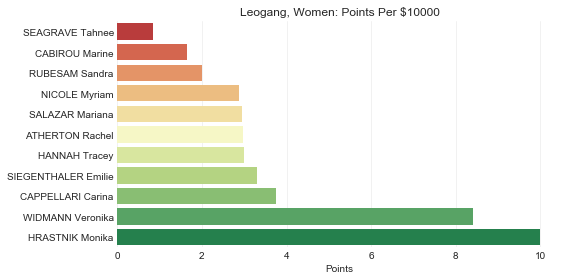

In [24]:
dfl['ppd'] = dfl['points'] / (dfl['cost']/10000)
data = dfl[:cnt].sort_values( 'ppd', ascending=True )

plt.figure(figsize=(8,10 if 'm' == gender else 4))
plot = sns.barplot( data['ppd'], data['name_x'], palette='RdYlGn' ) #, palette=colors )

sns.despine()
plot.set_frame_on(False)
plt.grid( True, which='major', axis='x', color='#EEEEEE' )
plot.set( title=chart_title_prefix + ': Points Per $10000', xlabel='Points', ylabel='' )
# plot.invert_xaxis()

plt.tight_layout()

if image_gen:
    plt.savefig( file_prefix + '_points_per_dollar.png', dpi=dpi )

In [25]:
dfx = df[['name', 'points', 'rank', 'WorldCupRank', 'UciRank', 'start_rev']].copy().dropna()
dfx['UciPerf'] = round( dfx['UciRank'] / dfx['points'], 2 )
dfx['UciRankPerf'] = round( dfx['UciRank'] / dfx['rank'], 2 )
dfx['RacePerf'] = dfx['start_rev'] / dfx['points']
dfx['RaceRankPerf'] = dfx['start_rev'] / dfx['rank']
dfx['WcRankPerf'] = dfx['WorldCupRank'] / dfx['rank']
# dfx['dpp'] = round( dfx['cost']/dfx['points'], 2 )
# dfx['ppd'] = round( dfx['points'] / (dfx['cost']/10000), 2 )

In [26]:
dfx.sort_values( 'UciRankPerf', ascending=False ).head()

,name,points,rank,WorldCupRank,UciRank,start_rev,UciPerf,UciRankPerf,RacePerf,RaceRankPerf,WcRankPerf
12,BALANCHE Camille,25.0,13.0,0,108,17.0,4.32,8.31,0.680000,1.307692,0.000000
9,BARTOVA Jana,55.0,10.0,0,54,15.0,0.98,5.40,0.272727,1.500000,0.000000
0,ATHERTON Rachel,200.0,1.0,2,5,8.0,0.02,5.00,0.040000,8.000000,2.000000
5,A'HERN Sian,111.0,6.0,14,28,10.0,0.25,4.67,0.090090,1.666667,2.333333
6,CURD Katy,90.0,7.0,8,30,7.0,0.33,4.29,0.077778,1.000000,1.142857


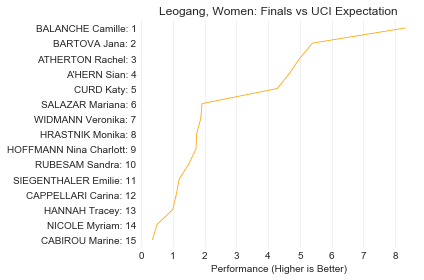

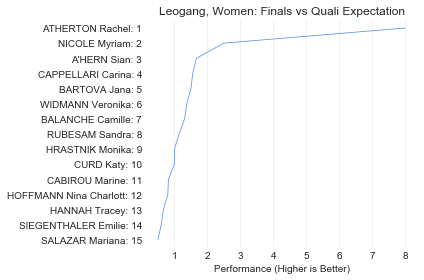

In [27]:
labs = [ 'Rank vs UCI Ranking', 'Rank vs Qualifying' ]
tits = [ 'UCI', 'Quali' ]
for idx, col in enumerate( [ 'UciRankPerf', 'RaceRankPerf' ] ):
    data = dfx.sort_values( col, ascending=False ).reset_index( drop=True )

    # ylabels = [ str(i+1) + ' ' + name + ' (' + str(data['UciRank'][i]) + '/' + str(data['rank'][i])[:-2] + ')' for i, name in enumerate( data['name'] ) ]
    ylabels = [ name + ': ' + str(i+1) for i, name in enumerate( data['name'] ) ]
    cols = [ 'orange', 'cornflowerblue', 'green', 'red' ]

    plt.figure(figsize=(6,10 if 'm' == gender else 4))
    plot = sns.pointplot( data[col], data['name'], scale=0.3, color=cols[idx], markers='' )

#     leg1 = mlines.Line2D( [], [], color=cols[0], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     leg2 = mlines.Line2D( [], [], color=cols[1], marker='', markersize=10, label=labs[idx], linestyle='-' )
#     plt.legend( handles=[leg1, leg2] )

    sns.despine()
    plot.set_frame_on(False)
    plt.grid( True, which='major', axis='x', color='#EEEEEE' )
    plot.set( title=chart_title_prefix + ': Finals vs ' + tits[idx] + ' Expectation', xlabel='Performance (Higher is Better)', ylabel='' )
    plot.set_yticklabels( ylabels )
    # plot.set(xscale="log")

    plt.tight_layout()

    if image_gen:
        plt.savefig( file_prefix + '_' + tits[idx].lower() + '_finals_performance.png', dpi=dpi )

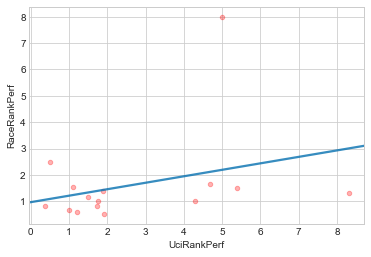

In [28]:
plot1 = sns.regplot( data['UciRankPerf'], data['RaceRankPerf'], marker='o', ci=None, line_kws={'color': '#0570b0', "alpha": 0.8}, scatter_kws={"s": 20, "alpha": 0.3, "color": "red"} ) #, fit_reg=False
# plot2 = sns.regplot( data['start_rev'], data['rank'], marker='*' )
# plt.ylim( 0, 61 )
# plot1.invert_xaxis()
# plot1.invert_yaxis()
# plot1.set(yscale="log")
